# MAST API Tutorial - Astroquery API

This tutorial will demonstrate how to search for observations, download data products, and display the results using the MAST Astroquery API.

Full documentation on **`astroquery.mast`** can be found <a href="https://astroquery.readthedocs.io/en/latest/mast/mast.html">here.</a>

## Table of Contents

1. [Imports](#Imports)
2. [Three ways to search for MAST observations](#Three-ways-to-search-for-MAST-observations)
    - [By Region](#1.-By-Region)
    - [By Object Name](#2.-By-Object-Name)
    - [By Criteria](#crit)<br><br>
    
3. [Getting data products associated with one or more observations](#Getting-data-products-associated-with-one-or-more-observations)
    - [Performing a product query](#Performing-a-product-query)
    - [Filtering data products](#Filtering-data-products)<br><br>
    
4. [Downloading data products](#Downloading-data-products)
5. [Displaying data](#Displaying-data)

## Imports
<div style="text-align: right">[(top)](#MAST-API-Tutorial---Astroquery-API)</div>

The only import needed for the MAST API is **`astroquery.mast`**, the others are for working with the data. 

In [1]:
from astroquery.mast import Observations

from astropy.io import fits

import matplotlib.pyplot as plt
%matplotlib inline 

from matplotlib.colors import LogNorm

## Three ways to search for MAST observations
<div style="text-align: right">[(top)](#MAST-API-Tutorial---Astroquery-API)</div>

### 1. By Region
<div style="text-align: right">[(top)](#MAST-API-Tutorial---Astroquery-API)</div>
This method allows for positional queries based on coordinates and radius.  
The coordinates can be given as a string or `astropy.coordinates` object, and the radius as a string or `Quantity` object.

In [2]:
obsByRegion = Observations.query_region("210.802 54.349", radius="0.02 deg")

In [3]:
print("Number of results:",len(obsByRegion))
print(obsByRegion[:10])

Number of results: 1144
dataproduct_type obs_collection instrument_name ...    objID    distance
---------------- -------------- --------------- ... ----------- --------
            cube          SWIFT            UVOT ... 15000541440      0.0
            cube          SWIFT            UVOT ... 15000478928      0.0
            cube          SWIFT            UVOT ... 15000533352      0.0
            cube          SWIFT            UVOT ... 15000814555      0.0
            cube          SWIFT            UVOT ... 15000511663      0.0
            cube          SWIFT            UVOT ... 15000804638      0.0
            cube          SWIFT            UVOT ... 15000544278      0.0
            cube          SWIFT            UVOT ... 15000804646      0.0
            cube          SWIFT            UVOT ... 15000563995      0.0
            cube          SWIFT            UVOT ... 15000814581      0.0


### 2. By Object Name
<div style="text-align: right">[(top)](#MAST-API-Tutorial---Astroquery-API)</div>
This method allows for positional queries based on object name and optional radius argument (default is 0.2 deg).  
The object name is first resolved to sky coordinates, and then the resolved region is queried as above.

In [4]:
obsByName = Observations.query_object("M101",radius=".02 deg")

In [5]:
print("Number of results:",len(obsByName))
print(obsByName[:10])

Number of results: 1149
dataproduct_type obs_collection instrument_name ...    objID    distance
---------------- -------------- --------------- ... ----------- --------
            cube          SWIFT            UVOT ... 15000541440      0.0
            cube          SWIFT            UVOT ... 15000478928      0.0
            cube          SWIFT            UVOT ... 15000533352      0.0
            cube          SWIFT            UVOT ... 15000814555      0.0
            cube          SWIFT            UVOT ... 15000511663      0.0
            cube          SWIFT            UVOT ... 15000804638      0.0
            cube          SWIFT            UVOT ... 15000544278      0.0
            cube          SWIFT            UVOT ... 15000804646      0.0
            cube          SWIFT            UVOT ... 15000563995      0.0
            cube          SWIFT            UVOT ... 15000814581      0.0


### 3. By Other Criteria (with or without name/region) <a id="crit"></a>
<div style="text-align: right">[(top)](#MAST-API-Tutorial---Astroquery-API)</div>
This method allows for queries based on criteria other than position (although a position/radius may also be supplied).<br>
The fields that can be searched on are given <a href="https://mast.stsci.edu/api/v0/_c_a_o_mfields.html">here</a>, and more information on how to construct criteria queries can be found <a href="https://astroquery.readthedocs.io/en/latest/mast/mast.html#observation-criteria-queries">here</a>.

In [2]:
obsByCriteria = Observations.query_criteria(obs_collection=["HST"], objectname="M101", radius=.02)

In [3]:
print(obsByCriteria[:10])

dataproduct_type calib_level obs_collection ...   objID1       distance   
---------------- ----------- -------------- ... ---------- ---------------
           image           3            HST ... 2012764440   24.3939406693
           image           3            HST ... 2012905356   24.7481829016
        spectrum           2            HST ... 2012700364 0.0702080653352
           image           3            HST ... 2012938583   43.4421460498
           image           3            HST ... 2012938560       22.779248
           image           3            HST ... 2018116865   13.9164739498
           image           3            HST ... 2012764446   24.3939406693
           image           3            HST ... 2012925602   70.0926914374
           image           3            HST ... 2012890600   52.3132690039
           image           2            HST ... 2012570277             0.0


## Getting data products associated with one or more observations
<div style="text-align: right">[(top)](#MAST-API-Tutorial---Astroquery-API)</div>

### Performing a product query
<div style="text-align: right">[(top)](#MAST-API-Tutorial---Astroquery-API)</div>

This query returns the data products associated with the given observations.

In [20]:
dataProducts = Observations.get_product_list(obsByCriteria[20:22])

In [21]:
print("Number of results:",len(dataProducts))
dataProducts.show_in_notebook(display_length=5)

Number of results: 44


idx,obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid
0,2003584534,HST,image,U2780101T,DADS C3M file - Calibrated exposure WFPC2,S,mast:HST/product/u2780101t/u2780101t_c3m.fits,AUXILIARY,--,C3M,--,HST,--,5397,u2780101t_c3m.fits,207360,2003584534
1,2003584534,HST,image,U2780101T,DADS C3T file - Calibrated data WFPC2,S,mast:HST/product/u2780101t/u2780101t_c3t.fits,AUXILIARY,--,C3T,--,HST,--,5397,u2780101t_c3t.fits,210240,2003584534
2,2003584534,HST,image,U2780101T,DADS CGR file - Calibrated data WFPC/FOC,S,mast:HST/product/u2780101t/u2780101t_cgr.fits,AUXILIARY,--,CGR,--,HST,--,5397,u2780101t_cgr.fits,31680,2003584534
3,2003584534,HST,image,U2780101T,DADS DGR file - Raw data WFPC/FOC,S,mast:HST/product/u2780101t/u2780101t_dgr.fits,AUXILIARY,--,DGR,--,HST,--,5397,u2780101t_dgr.fits,31680,2003584534
4,2003584534,HST,image,U2780101T,DADS JIF file,S,mast:HST/product/u2780101t/u2780101j_jif.fits,AUXILIARY,--,JIF,--,HST,--,5397,u2780101j_jif.fits,34560,2003584534
5,2003584534,HST,image,U2780101T,DADS JIT file,S,mast:HST/product/u2780101t/u2780101j_jit.fits,AUXILIARY,--,JIT,--,HST,--,5397,u2780101j_jit.fits,60480,2003584534
6,2003584534,HST,image,U2780101T,DADS Q0F file - Raw data quality WFPC/WFPC2/FOC/FOS/GHRS/HSP,S,mast:HST/product/u2780101t/u2780101t_q0f.fits,AUXILIARY,--,Q0F,--,HST,--,5397,u2780101t_q0f.fits,5184000,2003584534
7,2003584534,HST,image,U2780101T,DADS Q0M file - Raw data quality WFPC2,S,mast:HST/product/u2780101t/u2780101t_q0m.fits,AUXILIARY,--,Q0M,--,HST,--,5397,u2780101t_q0m.fits,5178240,2003584534
8,2003584534,HST,image,U2780101T,DADS Q1F file - Calibrated data quality WFPC/WFPC2/FOC/FOS/GHRS/HSP,S,mast:HST/product/u2780101t/u2780101t_q1f.fits,AUXILIARY,--,Q1F,--,HST,--,5397,u2780101t_q1f.fits,103680,2003584534
9,2003584534,HST,image,U2780101T,DADS Q1M file - Calibrated data quality WFPC2,S,mast:HST/product/u2780101t/u2780101t_q1m.fits,AUXILIARY,--,Q1M,--,HST,--,5397,u2780101t_q1m.fits,109440,2003584534


### Filtering the dataproducts

After the dataproducts have been retrieved you can filter on the returned columns.

In [22]:
scienceProducts = Observations.filter_products(dataProducts,productType=["SCIENCE"],mrp_only=False)

In [23]:
scienceProducts.show_in_notebook(display_length=5)

idx,obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid
0,2003584534,HST,image,U2780101T,DADS C0M file - Calibrated exposure WFPC2,S,mast:HST/product/u2780101t/u2780101t_c0m.fits,SCIENCE,--,C0M,--,HST,--,5397,u2780101t_c0m.fits,10307520,2003584534
1,2003584534,HST,image,U2780101T,DADS C1M file,S,mast:HST/product/u2780101t/u2780101t_c1m.fits,SCIENCE,--,C1M,--,HST,--,5397,u2780101t_c1m.fits,5178240,2003584534
2,2003584534,HST,image,U2780101T,DADS D0F file - Raw exposure WFPC/WFPC2/FOC/FOS/GHRS/HSP,S,mast:HST/product/u2780101t/u2780101t_d0f.fits,SCIENCE,--,D0F,--,HST,--,5397,u2780101t_d0f.fits,5184000,2003584534
3,2003584534,HST,image,U2780101T,DADS D0M file - Raw exposure WFPC2,S,mast:HST/product/u2780101t/u2780101t_d0m.fits,SCIENCE,--,D0M,--,HST,--,5397,u2780101t_d0m.fits,5178240,2003584534
4,2003584534,HST,image,U2780101T,DADS C0F file - Calibrated exposure WFPC/WFPC2/FOC/FOS/GHRS/HSP,S,mast:HST/product/u2780101t/u2780101t_c0f.fits,SCIENCE,Minimum Recommended Products,C0F,--,HST,--,5397,u2780101t_c0f.fits,10307520,2003584534
5,2003584534,HST,image,U2780101T,DADS C1F file - Calibrated exposure WFPC/FOC/FOS/GHRS/HSP,S,mast:HST/product/u2780101t/u2780101t_c1f.fits,SCIENCE,Minimum Recommended Products,C1F,--,HST,--,5397,u2780101t_c1f.fits,5184000,2003584534
6,2003584534,HST,image,U2780101T,DADS DRZ file - Calibrated combined image ACS/WFC3/WFPC2/STIS,S,mast:HST/product/u2780101t/u2780101t_drz.fits,SCIENCE,Minimum Recommended Products,DRZ,--,HST,--,5397,u2780101t_drz.fits,27262080,2003584534
7,2003584537,HST,image,U2780201T,DADS C0M file - Calibrated exposure WFPC2,S,mast:HST/product/u2780201t/u2780201t_c0m.fits,SCIENCE,--,C0M,--,HST,--,5397,u2780201t_c0m.fits,10307520,2003584537
8,2003584537,HST,image,U2780201T,DADS C1M file,S,mast:HST/product/u2780201t/u2780201t_c1m.fits,SCIENCE,--,C1M,--,HST,--,5397,u2780201t_c1m.fits,5178240,2003584537
9,2003584537,HST,image,U2780201T,DADS D0F file - Raw exposure WFPC/WFPC2/FOC/FOS/GHRS/HSP,S,mast:HST/product/u2780201t/u2780201t_d0f.fits,SCIENCE,--,D0F,--,HST,--,5397,u2780201t_d0f.fits,5184000,2003584537


## Downloading products
<div style="text-align: right">[(top)](#MAST-API-Tutorial---Astroquery-API)</div>

Products will by default be downloaded into the current working durectory, in a subdirectory called "mastDownload."<br>
The full local file paths will have the form "mastDownload/Mission/Observation ID/file."

Data product filtering can also be performed directly while downloading data, as in this instance where we will only download the drizzled files.

Note: `download_files` includes caching by default, so if the files have been downloaded, they will not be downloded again unless caching is turned off.

In [24]:
manifest = Observations.download_products(scienceProducts,mrp_only=False,extension="drz.fits", cache=False)

In [25]:
manifest

Local Path,Status,Message,URL
str47,str8,object,object
./mastDownload/HST/U2780101T/u2780101t_drz.fits,COMPLETE,None,None
./mastDownload/HST/U2780201T/u2780201t_drz.fits,COMPLETE,None,None


## Displaying data
<div style="text-align: right">[(top)](#MAST-API-Tutorial---Astroquery-API)</div>

At this point the data is ready for analysis, and we are done using `mast.astroquery`. <br>
Below we take a look at the data files using `astropy` and `matplotlib`.

In [26]:
file1 = fits.open(manifest['Local Path'][0])
file2 = fits.open(manifest['Local Path'][1])

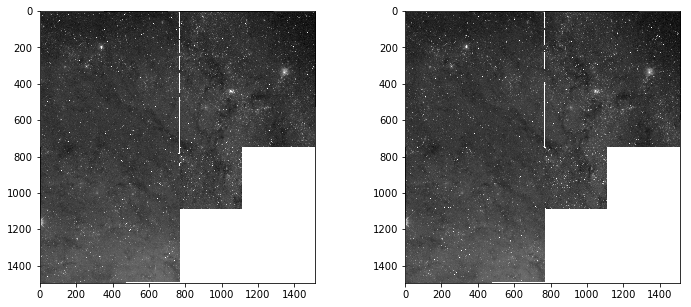

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figheight(5)
f.set_figwidth(12)
ax1.imshow(file1['SCI'].data, cmap="gray", norm=LogNorm(vmin=0.01, vmax=1))
ax2.imshow(file2['SCI'].data, cmap="gray", norm=LogNorm(vmin=0.01, vmax=1))